In [1]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import triang

# Implements section 5.3 of Kruschke's Doing Bayesian Analysis

def plot_coin_dist(N=11, theta=0.5):

    theta_range = np.linspace(0, 1.0, N)

    prior = np.array([triang.pdf(t, theta) for t in theta_range])
    prior /= sum(prior)

    def likelihood(y, theta):
        return theta**y * (1-theta)**(1-y)

    y = 1
    lh = np.array([likelihood(y, th) for th in theta_range])

    post = np.array([pr * l for pr, l in zip(prior, lh)])
    post /= sum(post)
    plt.subplot(311)
    plt.plot(theta_range, prior)
    plt.subplot(312)
    plt.plot(theta_range, lh)
    plt.subplot(313)
    plt.plot(theta_range, post);

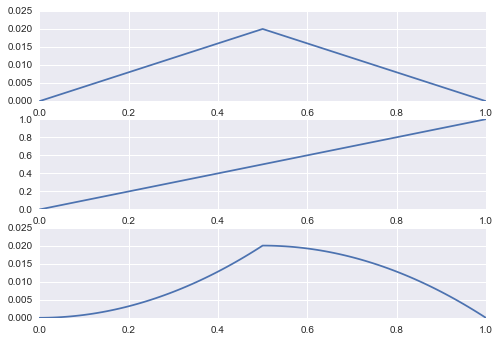

In [3]:
from ipywidgets import interact, IntSlider, FloatSlider

interact(plot_coin_dist, 
         N=IntSlider(min=11, max=101, value=101, continuous_update=False), 
         theta=FloatSlider(min=0.1, max=0.9, value=0.5, continuous_update=False));

In [4]:
from numpy.random import binomial

def draw_coin_dist(bias=0.5, flips=50):
    """ With this one we simulate multiple flips of a single coin
    with a given bias. We flip `flips` times, and compute the 
    posterior. We start with a triangular prior. 
    
    """
    
    N = 101
    theta = np.linspace(0, 1.0, N)

    prior = np.array([triang.pdf(t, 0.5) for t in theta])
    prior /= sum(prior)

    def likelihood(theta, heads, tails):
        return theta**heads * (1-theta)**tails

    plt.subplot(311)
    plt.title('prior')
    plt.plot(theta, prior)

    ys = binomial(1, bias, flips)
    results = ['H' if y == 1 else 'T' for y in ys]
    print(''.join(results))
    
    # plot results of 1..N flips so we can see how the posterior
    # changes with more data. I'll keep the color palette the same
    # for each plot so we don't end up with a rainbow of lines
    # for the posterior.
    with seaborn.color_palette(n_colors=1): 
        for i in range(flips):
            heads = sum(ys[:i+1])
            tails = (i+1)-heads
            lh = np.array([likelihood(th, heads, tails) for th in theta])

            post = np.array([pr * l for pr, l in zip(prior, lh)])
            post /= sum(post)
            plt.subplot(313)
            plt.title('posterior')
            plt.plot(theta, post, alpha=max(.2, i/flips));
        
    plt.subplot(312)
    plt.title('likelihood')
    plt.plot(theta, lh)

HTHHTTHHTHTTHTHTHHTH


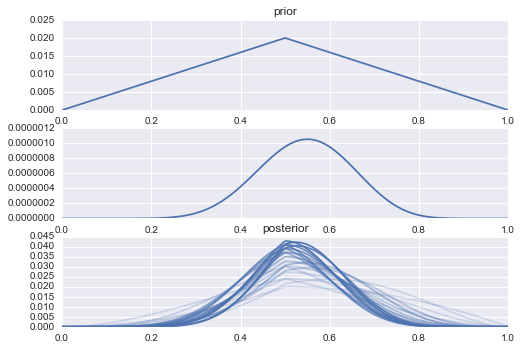

In [5]:
interact(draw_coin_dist, 
         bias=FloatSlider(min=.1, max=.9, value=0.5, continuous_update=False), 
         flips=IntSlider(min=5, max=100, value=20, continuous_update=False));